 ## 4. Exploratory Data Analysis


  #### Objectives
- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


### Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setting this option will print all collumns of a dfframe
pd.set_option('display.max_columns', None)
# Setting this option will print all of the df in a feature
pd.set_option('display.max_colwidth', None)

### 0. Load Data

In [14]:
# Load Data
df=pd.read_csv("..\data\processed\spacex_falcon9_data_cleaned.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2006-03-24,Falcon 1,20.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin1A,167.743129,9.047721,0
1,2,2007-03-21,Falcon 1,8028.741946,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2A,167.743129,9.047721,0
2,4,2008-09-28,Falcon 1,165.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin2C,167.743129,9.047721,0
3,5,2009-07-13,Falcon 1,200.000000,LEO,Kwajalein Atoll,None None,1,False,False,False,NaN,NaN,0,Merlin3C,167.743129,9.047721,0
4,6,2010-06-04,Falcon 9,8028.741946,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0


### 1. Number of launches on Each Site

The data contains several Space X [launch facilities](https://en.wikipedia.org/wiki/List_of_Cape_Canaveral_and_Merritt_Island_launch_sites)

In [15]:
# Apply value_counts() on column LaunchSite
df['LaunchSite'].value_counts()

LaunchSite
CCSFS SLC 40       93
KSC LC 39A         49
VAFB SLC 4E        26
Kwajalein Atoll     4
Name: count, dtype: int64

### 2. Number and Occurrence of Each Orbit

* <b>LEO</b>: Low Earth orbit (LEO)is an Earth-centred orbit with an altitude of 2,000 km (1,200 mi) or less (approximately one-third of the radius of Earth),[1] or with at least 11.25 periods per day (an orbital period of 128 minutes or less) and an eccentricity less than 0.25.[2] Most of the manmade objects in outer space are in LEO <a href='https://en.wikipedia.org/wiki/Low_Earth_orbit'>[1]</a>.

* <b>VLEO</b>: Very Low Earth Orbits (VLEO) can be defined as the orbits with a mean altitude below 450 km. Operating in these orbits can provide a number of benefits to Earth observation spacecraft as the spacecraft operates closer to the observation<a href='https://www.researchgate.net/publication/271499606_Very_Low_Earth_Orbit_mission_concepts_for_Earth_Observation_Benefits_and_challenges'>[2]</a>.


* <b>GTO</b> A geosynchronous orbit is a high Earth orbit that allows satellites to match Earth's rotation. Located at 22,236 miles (35,786 kilometers) above Earth's equator, this position is a valuable spot for monitoring weather, communications and surveillance. Because the satellite orbits at the same speed that the Earth is turning, the satellite seems to stay in place over a single longitude, though it may drift north to south,” NASA wrote on its Earth Observatory website <a  href="https://www.space.com/29222-geosynchronous-orbit.html" >[3] </a>.


* <b>SSO (or SO)</b>: It is a Sun-synchronous orbit  also called a heliosynchronous orbit is a nearly polar orbit around a planet, in which the satellite passes over any given point of the planet's surface at the same local mean solar time <a href="https://en.wikipedia.org/wiki/Sun-synchronous_orbit">[4] <a>.
    
    
    
* <b>ES-L1 </b>:At the Lagrange points the gravitational forces of the two large bodies cancel out in such a way that a small object placed in orbit there is in equilibrium relative to the center of mass of the large bodies. L1 is one such point between the sun and the earth <a href="https://en.wikipedia.org/wiki/Lagrange_point#L1_point">[5]</a> .
    
    
* <b>HEO</b> A highly elliptical orbit, is an elliptic orbit with high eccentricity, usually referring to one around Earth <a href="https://en.wikipedia.org/wiki/Highly_elliptical_orbit">[6]</a>.


* <b> ISS </b> A modular space station (habitable artificial satellite) in low Earth orbit. It is a multinational collaborative project between five participating space agencies: NASA (United States), Roscosmos (Russia), JAXA (Japan), ESA (Europe), and CSA (Canada)<a href="https://en.wikipedia.org/wiki/International_Space_Station"> [7] </a>


* <b> MEO </b> Geocentric orbits ranging in altitude from 2,000 km (1,200 mi) to just below geosynchronous orbit at 35,786 kilometers (22,236 mi). Also known as an intermediate circular orbit. These are "most commonly at 20,200 kilometers (12,600 mi), or 20,650 kilometers (12,830 mi), with an orbital period of 12 hours <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [8] </a>


* <b> HEO </b> Geocentric orbits above the altitude of geosynchronous orbit (35,786 km or 22,236 mi) <a href="https://en.wikipedia.org/wiki/List_of_orbits"> [9] </a>


* <b> GEO </b> It is a circular geosynchronous orbit 35,786 kilometres (22,236 miles) above Earth's equator and following the direction of Earth's rotation <a href="https://en.wikipedia.org/wiki/Geostationary_orbit"> [10] </a>


* <b> PO </b> It is one type of satellites in which a satellite passes above or nearly above both poles of the body being orbited (usually a planet such as the Earth <a href="https://en.wikipedia.org/wiki/Polar_orbit"> [11] </a>

some are shown in the following plot:

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/Orbits.png)


In [16]:
# Apply value_counts on Orbit column
df['Orbit'].value_counts()

Orbit
VLEO     54
ISS      32
GTO      31
LEO      18
PO       13
SSO      11
MEO       5
GEO       2
TLI       2
ES-L1     1
HEO       1
SO        1
Name: count, dtype: int64

### 3. Number and Occurence of Mission Outcome of the Orbits

In [17]:
landing_outcomes = df['Outcome'].value_counts()
landing_outcomes

Outcome
True ASDS      109
None None       23
True RTLS       23
False ASDS       7
True Ocean       5
False Ocean      2
None ASDS        2
False RTLS       1
Name: count, dtype: int64

<code>True Ocean</code> means the mission outcome was successfully  landed to a specific region of the ocean while <code>False Ocean</code> means the mission outcome was unsuccessfully landed to a specific region of the ocean. <code>True RTLS</code> means the mission outcome was successfully  landed to a ground pad <code>False RTLS</code> means the mission outcome was unsuccessfully landed to a ground pad.<code>True ASDS</code> means the mission outcome was successfully  landed to a drone ship <code>False ASDS</code> means the mission outcome was unsuccessfully landed to a drone ship. <code>None ASDS</code> and <code>None None</code> these represent a failure to land.

### 4. Flight Number vs. Payload
First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.


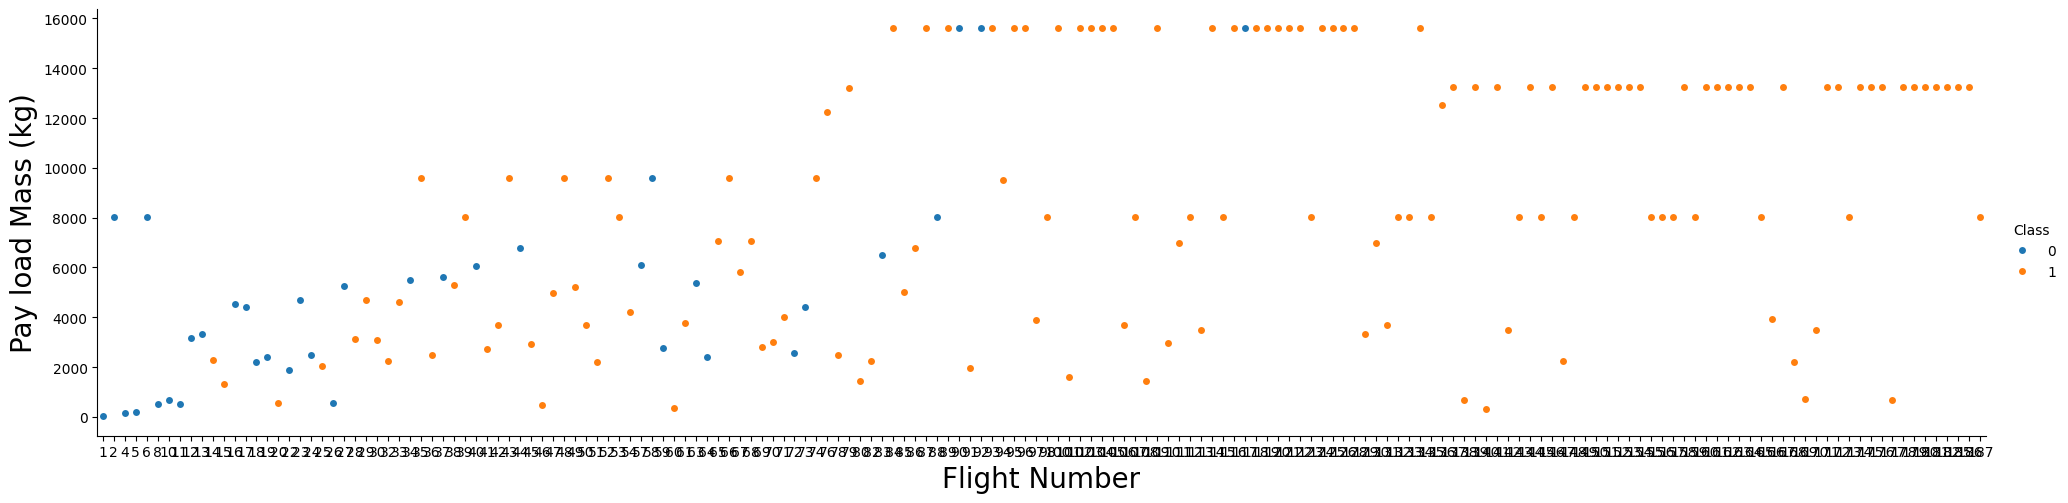

In [12]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

**💡Insights:**
- As the number of flights increases, the success rate of first stage landings also improves, reflecting SpaceX’s operational learning curve. Heavier payloads tend to be associated with more failed landings, indicating that payload mass still poses a technical challenge for recovery. More recent missions, especially those with moderate payloads, show higher success rates—suggesting that experience and refinements over time have led to more reliable landings.

### 5. Flight Number and Launch Site


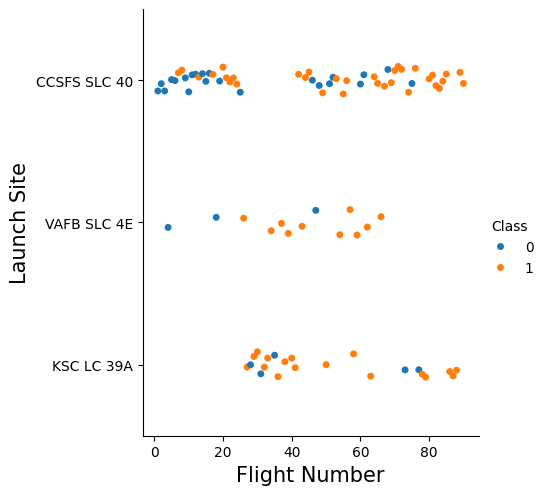

In [6]:
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect = 1)
plt.xlabel("Flight Number",fontsize=15)
plt.ylabel("Launch Site",fontsize=15)
plt.show()

**💡Insights:**
- The plot shows that as Flight Number increases, the success rate improves across all launch sites, reflecting the learning curve effect. CCAFS SLC 40 has the highest number of launches with consistent success in later flights. KSC LC 39A and VAFB SLC 4E show fewer launches but follow a similar trend of increased success with experience. 

### 6. Payload and Launch Site


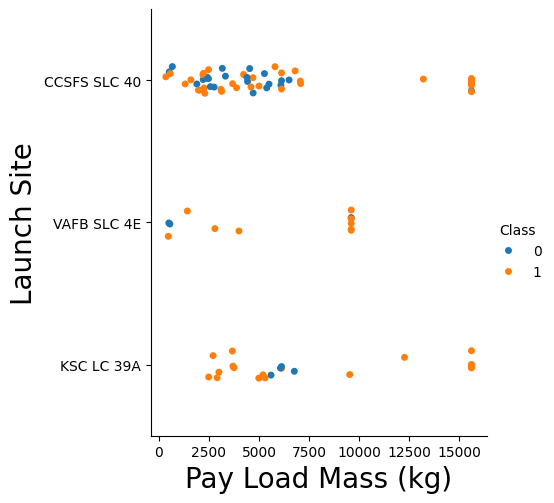

In [7]:
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect = 1)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

**💡Insights:**
- The plot shows that CCAFS SLC 40 and KSC LC 39A handled a wide range of payload masses, including heavy payloads above 10,000 kg. 
In contrast, VAFB SLC 4E had no launches with heavy payloads, operating only with lighter missions.



### 7. Success Rate of Each Orbit Type


Visually check if there are any relationship between success rate and orbit type.


C:\Users\reyna\AppData\Local\Temp\ipykernel_11128\1389660748.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(y='Class', x="Orbit", data=df, ci=None)


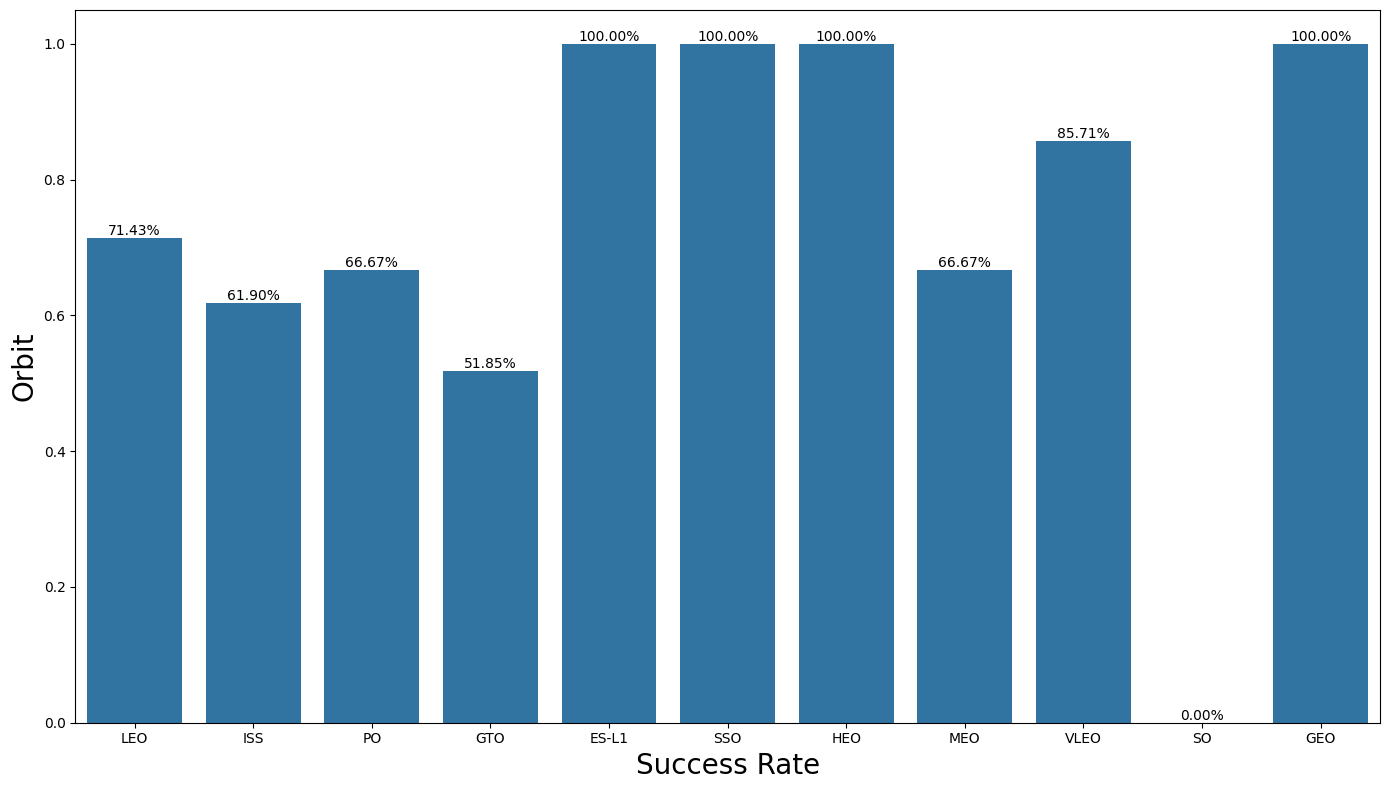

In [8]:
fig, ax = plt.subplots(figsize=(14, 8)) 

df.groupby(['Orbit'])['Class'].mean()
sns.barplot(y='Class', x="Orbit", data=df, ci=None)

# Adiciona rótulos com valores percentuais em cima de cada barra
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height*100:.2f}%',  # converte para percentual e arredonda
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)



plt.xlabel("Success Rate",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.tight_layout()
plt.show()

**💡Insights:**
- The bar chart shows that most orbits achieved high success rates, especially ES-L1, GEO, HEO, SSO, and PO with near or full 100% success. In contrast, GTO exhibits a notably lower success rate, indicating higher recovery challenges for missions targeting this orbit


### 8. FlightNumber vs. Orbit type
For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.

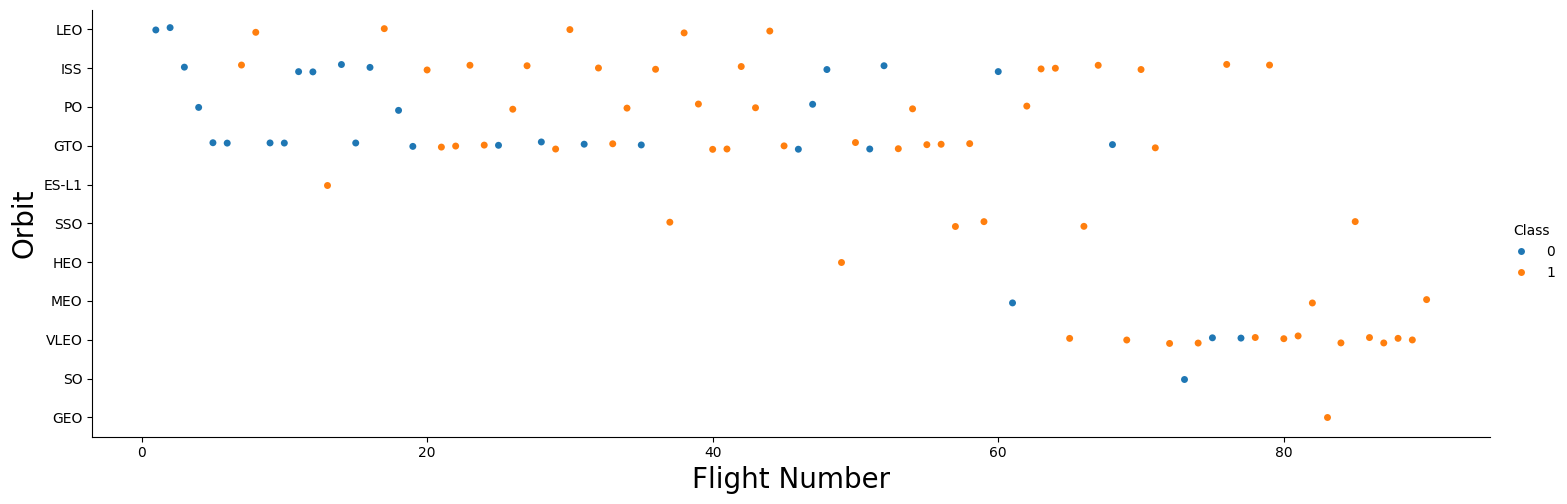

In [9]:
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect = 3)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

**💡Insights:**
- For the LEO orbit, success rates improve with higher flight numbers, indicating experience positively impacts outcomes. In contrast, for GTO orbit, there’s no clear relationship between flight experience and success, suggesting GTO remains technically more challenging regardless of accumulated launches.


### 9. Payload vs. Orbit type
Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type

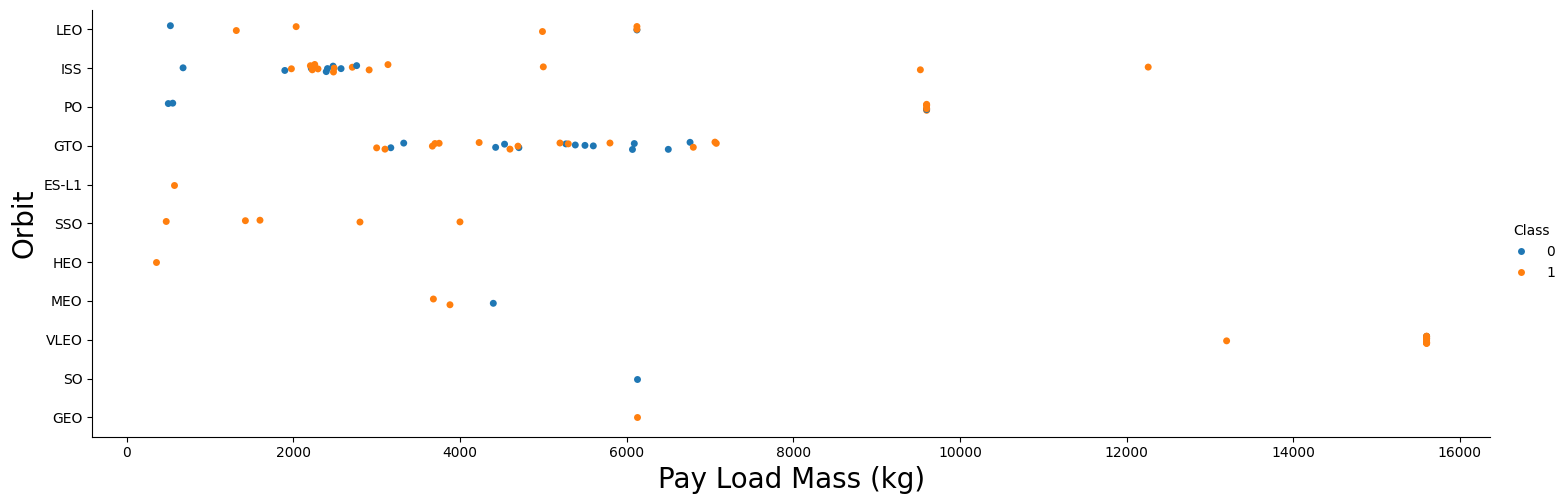

In [10]:
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect = 3)
plt.xlabel("Pay Load Mass (kg)",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()

**💡Insights:**
- With heavier payloads, orbits like Polar, LEO, and ISS show higher success rates. 
- For GTO, both successes and failures are observed across the payload range, making it harder to identify a clear pattern between payload mass and landing outcome for this orbit.




### 10. Launch success yearly Trend


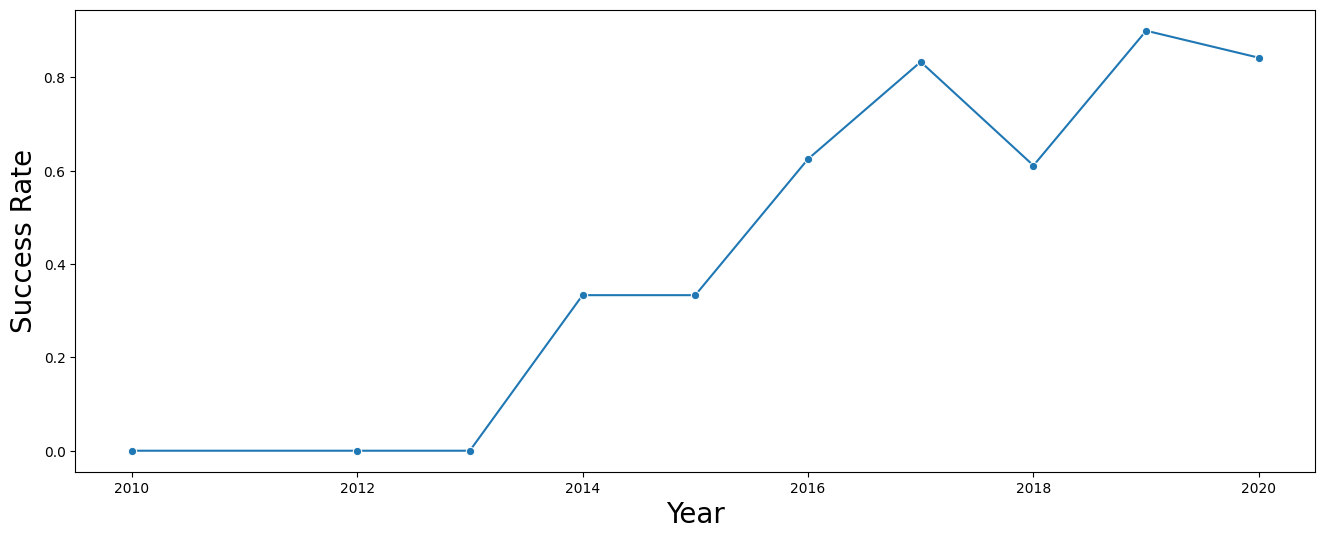

In [11]:
df["Date"] = pd.to_datetime(df["Date"])

# Extrai ano da data (assumindo que year é uma coluna ou variável com os anos)
year = df["Date"].dt.year
plt.figure(figsize=(16, 6))
sns.lineplot(x=year, y=df["Class"], errorbar=None, marker='o')

#Customização
plt.xlabel("Year", fontsize=20)
plt.ylabel("Success Rate", fontsize=20)
plt.show()


**💡Insights:**
- You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.
